## Exercise 10.1 (search)

We want to find the largest and smallest values in a long list of numbers. Implement
two algorithms, based on:

1. Iterating over the list entries; and 
1. First applying a built-in sort operation to the list.

Encapsulate each algorithm in a function. To create lists of numbers for testing use, for example:
```python
x = np.random.rand(1000)
```

### Solution

We first create the list of random numbers

In [1]:
import numpy as np
x = np.random.rand(100000)

#### Approach 1

In [2]:
def min_max1(x):
    # YOUR CODE HERE
    x_min = x_max = x[0]
    for item in x:
        if item < x_min:
            x_min = item
        elif item > x_max:
            x_max = item
        
    return  x_min, x_max
    
%time print(min_max1(x))

(2.4999619766541414e-06, 0.9999796192400995)
CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 135 ms


#### Approach 2

In [3]:
def min_max2(x):
    # YOUR CODE HERE
    x.sort()
    return x[0], x[-1]

%time print(min_max2(x))

(2.4999619766541414e-06, 0.9999796192400995)
CPU times: user 76.7 ms, sys: 0 ns, total: 76.7 ms
Wall time: 75.6 ms


In [4]:
assert min_max1(x) == min_max2(x)

In practice, we would use the the NumPy function:

In [5]:
%time print(np.min(x), np.max(x))

2.4999619766541414e-06 0.9999796192400995
CPU times: user 433 µs, sys: 0 ns, total: 433 µs
Wall time: 441 µs


## Exercise 10.2 (Newton's method for root finding)

### Background

Newton's method can be used to find a root $x$ of a function $f(x)$ such that
$$
f(x) = 0
$$
A Taylor series expansion of $f$ about $x_{i}$ reads:
$$
f(x_{i+1}) = f(x_{i}) + \left. f^{\prime} \right|_{x_{i}} (x_{i+1} - x_{i}) +  O((x_{i+1} - x_{i})^{2})
$$
If we neglect the higher-order terms and set $f(x_{i+1})$ to zero, we have Newton's method:
\begin{align}
x_{i + 1} &= - \frac{f(x_{i})}{f^{\prime}(x_{i})} + x_{i}
\\
x_{i} &\leftarrow x_{i+1}
\end{align}
In Newton's method, the above is applied iteratively until $\left|f(x_{i + 1})\right|$ is below a tolerance value.

### Task

Develop an implementation of Newton's method, with the following three functions in your implementation:
```python
def newton(f, df, x0, tol, max_it):
    # Implement here
    
    return x1  # return root
```
where `x0` is the initial guess, `tol` is the stopping tolerance, `max_it` is the maximum number 
of iterations, and 
```python
def f(x):
    # Evaluate function at x and return value


def df(x):
    # Evaluate df/dx at x and return value

```

Your implementation should raise an exception if the maximum number of iterations (`max_it`)
is exceeded.

Use your program to find the roots of:
$$
f(x) = \tan(x) - 2x
$$
between $-\pi/2$ and $\pi/2$. Plot $f(x)$ and $f^{\prime}(x)$ on the same graph, 
and show the roots computed by Newton's method.

Newton's method can be sensitive to the starting value. Make sure you find the root around $x = 1.2$. What happens if you start at $x = 0.9$? It may help to add a print statement in the iteration loop, showing $x$ and $f$ at each iteration.


### Extension (optional)

For a complicated function we might not know how to compute the derivative, or it may be very complicated
to evaluate. Write a function that computes the *numerical derivative* of $f(x)$ by evaluating 
$(f(x + dx) - f(x - dx)) / (2dx)$, where $dx$ is small. How should you choose $dx$?

### Solution

We first implement a Newton solver function:

In [6]:
import numpy as np

def newton(f, df, x, tol=1e-8, max_it=20):
    """Find root of equation defined by function f(x) where df(x) is
    first derivative and x is the initial guess.Optional arguments tol 
    (tolerance) and max_it (maximum number of iterations)"""
    
    # YOUR CODE HERE
    #newton_x = [x,] # Keep track of all the x_values
    error = tol + 1
    it = 0
    while error > tol and it < max_it:
        x = x - f(x)/df(x)
        #newton_x.append(x) # Add x to the list of x-values
        print("x: {}, f: {}".format(x,f(x)))
        error = abs(f(x) - 0)
        it+=1
    if it >= max_it:
        raise RecursionError("Number of iterations has exceeded {}".format(max_it))
    return x

We now provide implementations of `f` and `df`, and find the roots:

In [7]:
def f(x):
    # YOUR CODE HERE
    return np.tan(x) - 2*x

def df(x):
    # YOUR CODE HERE
    return 1/np.cos(x)**2 - 2

In [8]:
# Calculate numerically the root of f(x):
x = 1.2
print(x)
x1 = newton(f, df, x)
print(x1)

x = 0.9
print(x)
newton(f, df, x)

1.2
x: 1.1693460244525156, f: 0.016999363031696912
x: 1.1656093110709203, f: 0.00021343115123606538
x: 1.165561193040886, f: 3.4735544662822804e-08
x: 1.1655611852072116, f: 1.3322676295501878e-15
1.1655611852072116
0.9
x: 1.8181002473542365, f: -7.597035324185402
x: 2.335320113296922, f: -5.713285365321915
x: 67.92318000582891, f: -138.3577758533175
x: 93.99295830985557, f: -188.24640055503292
x: -107.95606312706965, f: 213.72523583628197
x: -164.4599145063112, f: 326.96910107786096
x: -281.0123331844109, f: 555.8363266396033
x: -295.9158899744736, f: 591.1385312010754
x: 842.1886634107054, f: -1684.1306672702165
x: -951.0439513725607, f: 1903.2462281174435
x: -6520.689320714553, f: 13044.460425307157
x: -8055.802755909384, f: 16110.656596891744
x: 153762.01519404276, f: -307524.12632404914
x: -156618.76555044675, f: 313236.1415739871
x: -493147.7530016875, f: 986296.2082063131
x: 1452551.0826445962, f: -2905099.8585474715
x: 2124863.346082732, f: -4249726.661218119
x: -2128937.342581

RecursionError: Number of iterations has exceeded 20

We can visualise the result:

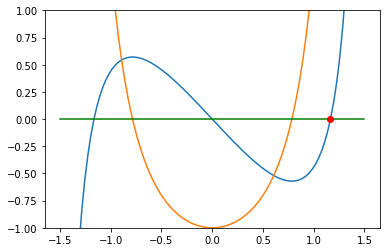

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
'''
newton_x = []
newton_y =[]

for item in newton_x1:
    print(item)
    newton_x.append(item)
    newton_y.append(0)
    
    newton_x.append(item)
    newton_y.append(f(item))
'''

# Plot f and df/dx
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")
plt.ylim(-1,1)
#plt.xlim(1.1, 1.3)
plt.plot(x, np.zeros(len(x)), 'g')
# Add location of roots to plot
plt.plot(x1, f(x1), '-ro') # Plot root for x0 = 1.2
#plt.plot(newton_x, newton_y) # Plot x values and there 

plt.show()

For the extension, we can replace the function `df(x)` with a new version

In [10]:
def df(x):
    # Try changing dx to 1e-15 or smaller
    dx = 1e-15
    # YOUR CODE HERE
    dy_dx = (f(x + dx) - f(x - dx)) / (2*dx)
    return (dy_dx)

In [11]:
# Find roots near -1.2, 0.1, and 1.2
xroots = np.array((newton(f, df, -1.2),
                   newton(f, df, 0.1),
                   newton(f, df, 1.2)))
assert np.isclose(xroots, [-1.16556119e+00, 2.08575213e-10, 1.16556119e+00]).all()

x: -1.172310643526453, f: -0.030622859562877913
x: -1.1663144218344357, f: -0.003348475919245253
x: -1.1656289584297914, f: -0.00030058428544332827
x: -1.165567426099068, f: -2.7673519397808377e-05
x: -1.1655617610785387, f: -2.5534941703320158e-06
x: -1.1655612610822172, f: -3.3643984087561307e-07
x: -1.165561192209929, f: -3.105097157174441e-08
x: -1.1655611858535133, f: -2.865788051309437e-09
x: -0.0011499118101911676, f: 0.0011499113033491882
x: -7.879195893303881e-08, f: 7.879195893303865e-08
x: -2.8581749053068097e-16, f: 2.8581749053068097e-16
x: 1.172310643526453, f: 0.030622859562877913
x: 1.1663144218344357, f: 0.003348475919245253
x: 1.1656289584297914, f: 0.00030058428544332827
x: 1.165567426099068, f: 2.7673519397808377e-05
x: 1.1655617610785387, f: 2.5534941703320158e-06
x: 1.1655612610822172, f: 3.3643984087561307e-07
x: 1.165561192209929, f: 3.105097157174441e-08
x: 1.1655611858535133, f: 2.865788051309437e-09


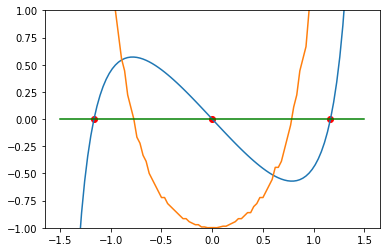

In [12]:
# Plot f, f' and roots
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, df(x), label="$f^{\prime}(x)$")
plt.ylim(-1,1)
plt.legend
plt.plot(x, np.zeros(len(x)), 'g')
# Add location of roots to plot
plt.scatter(xroots, f(xroots), color='r') # Plot root for x0 = -1.2, 0, 1.2
plt.show()

In practice, we could use the Newton function `scipy.optimize.newton` from SciPy (http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) rather than implementing our own function.

## Exercise 10.3 (optional, low pass image filter)

Images files can be loaded and displayed with Matplotlib. An imported image is stored as a 
three-dimensional NumPy array of floats. The shape of the array is `[0:nx, 0:ny, 0:3]`. 
where `nx` is the number of pixels in the $x$-direction, `ny` is the number of pixels in the $y$-direction,
and the third axis is for the colour component (RGB: red, green and blue) intensity. See http://matplotlib.org/users/image_tutorial.html for more background.

Below we fetch an image and display it:

<class 'numpy.ndarray'>
Image array shape: (375, 500, 3)


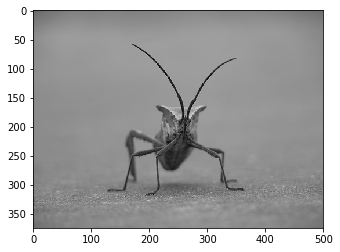

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Import image
img = mpimg.imread('https://raw.githubusercontent.com/matplotlib/matplotlib.github.com/master/_images/stinkbug.png')

# Check type and shape
print(type(img))
print("Image array shape: {}".format(img.shape))

# Display image
plt.imshow(img);

The task is to write a *function* that applies a particular low-pass filter algorithm to an image array 
and  returns the  filtered image. With this particular filter, the value of a pixel in the filtered image 
is equal to the average value of the four neighbouring pixels in the original image. For the `[i, j, :]` pixel, 
the neighbours are  `[i, j+1, :]`, `[i, j-1, :]`, `[i+1, j, :]` and  `[i-1, j, :]`. 

Run the filter algorithm multiple times on the above image to explore the effect of the filter.

*Hint*: To create a NumPy array of zeros, `B`,  with the same shape as array `A`, use:
```python
import numpy as np
B = np.zeros_like(A)
```

In [14]:
#Install latest version of pip
!pip install --upgrade pip

#Increase speed using numba library
!pip -q install numba # -q is for quiet mode
import numba #Get numba to speed up the process

Requirement already up-to-date: pip in /home/nbuser/anaconda3_420/lib/python3.5/site-packages (19.3.1)


In [15]:
@numba.jit
def get_neighbours_avg(img_a,x,y): # Note: [x,y] axis is flipped
    "return the average of the neighbouring pixels. If on the edges, then return only the valid ones"
    x_max = img_a.shape[0] - 1
    y_max = img_a.shape[1] - 1
    if x == 0 and y == 0: # Top left corner, so return below, right
        return (img_a[x+1,y] + img_a[x,y+1])/2
    elif x == 0 and y == y_max: #Top right, so return below, left
        return (img_a[x+1,y] + img_a[x,y-1])/2
    elif x == x_max and y == 0: # Bottom left, so return above, right
        return (img_a[x-1,y] + img_a[x,y+1])/2
    elif x == x_max and y == y_max: # Bottom right, so return above, left
        return (img_a[x-1,y] + img_a[x,y-1])/2
    elif x == 0: # Top and not corner, so return left, below and right
        return (img_a[x,y-1] + img_a[x+1,y] + img_a[x,y+1])/3
    elif x == x_max: # Bottom and not corner, so return left, above and right
        return (img_a[x,y-1] + img_a[x-1,y] + img_a[x,y+1])/3
    elif y == 0: # Left most and not corner, so return above, right, below
        return (img_a[x-1,y] + img_a[x,y+1] + img_a[x+1,y])/3
    elif y == y_max: # Right most and not corner, so return above, left, below
        return (img_a[x-1,y] + img_a[x,y-1] + img_a[x+1,y])/3
    else: # In the middle somewhere, so return all 4
        return (img_a[x,y+1] + img_a[x,y-1] + img_a[x+1,y] + img_a[x-1,y]) / 4

@numba.jit
def filter_img(img_a):
    "Function to filter an image by averaging the value of the four pixels beside it"
    img_b = np.zeros_like(img_a) # Create np.array with same shape as img_a
    #Note that the edges will have filtered applied without the "missing" pixel
    for i in range(img_b.shape[0]): # iterate along x-dir
        for j in range(img_b.shape[1]): # iterate along y-dir
            img_b[i,j] = get_neighbours_avg(img_a,i,j)
            
    return img_b    

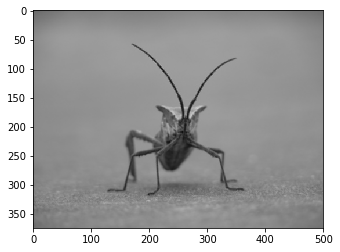

In [16]:
%matplotlib inline
img_b1 = filter_img(img)
plt.imshow(img_b1)

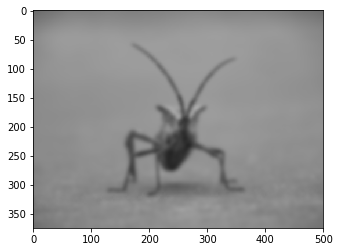

In [17]:
temp_img = img_b1
for i in range(20):
    temp_img = filter_img(temp_img)
    plt.imshow(temp_img)